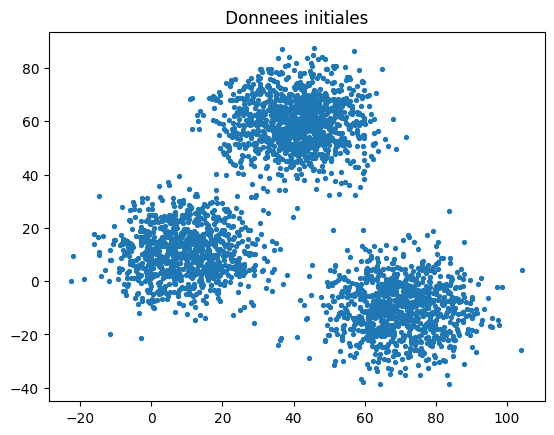

In [2]:
import numpy as np
import matplotlib . pyplot as plt
from scipy . io import arff
import time
from sklearn import cluster
from sklearn.metrics import silhouette_score
import sys

path = "./artificial/"
databrut = arff.loadarff(open(path + "xclara.arff",'r'))
datanp = [ [ x [ 0 ] ,x [ 1 ] ] for x in databrut [ 0 ] ]

f0 = np.array(datanp)[:,0]
f1 = np.array(datanp)[:,1]

plt.scatter( f0 , f1 , s = 8 )
plt.title( " Donnees initiales " )
plt.show()

Appel KMeans pour plusieurs valeurs de k
nb clusters =  2 , score =  0.6305972114000131  , nb iter =  3  ,runtime =  4.11  ms 
nb clusters =  3 , score =  0.47158111103878236  , nb iter =  15  ,runtime =  6.55  ms 
nb clusters =  4 , score =  0.3472885992986082  , nb iter =  7  ,runtime =  10.03  ms 
nb clusters =  5 , score =  0.36157183765343176  , nb iter =  9  ,runtime =  0.0  ms 
nb clusters =  6 , score =  0.38959264858639103  , nb iter =  11  ,runtime =  10.05  ms 
nb clusters =  7 , score =  0.3825243616220394  , nb iter =  15  ,runtime =  0.0  ms 
nb clusters =  8 , score =  0.4048097624792126  , nb iter =  11  ,runtime =  9.04  ms 


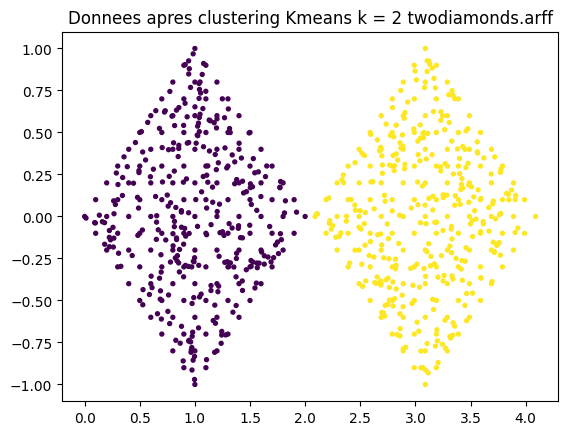

nb clusters =  2 , score =  0.4331333450630552  , nb iter =  5  ,runtime =  4.3  ms 
nb clusters =  3 , score =  0.6171807766046922  , nb iter =  4  ,runtime =  9.55  ms 
nb clusters =  4 , score =  0.5349030089406274  , nb iter =  11  ,runtime =  0.0  ms 
nb clusters =  5 , score =  0.4724576527150261  , nb iter =  7  ,runtime =  9.58  ms 
nb clusters =  6 , score =  0.40108763959258875  , nb iter =  9  ,runtime =  8.16  ms 
nb clusters =  7 , score =  0.41456590883178507  , nb iter =  10  ,runtime =  9.71  ms 
nb clusters =  8 , score =  0.4207103874956055  , nb iter =  13  ,runtime =  2.44  ms 


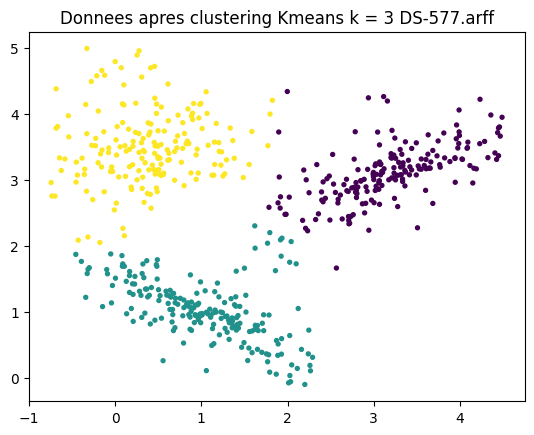

nb clusters =  2 , score =  0.42462132277347137  , nb iter =  5  ,runtime =  0.0  ms 
nb clusters =  3 , score =  0.4579366608152078  , nb iter =  6  ,runtime =  0.0  ms 
nb clusters =  4 , score =  0.5973265109573306  , nb iter =  3  ,runtime =  0.0  ms 
nb clusters =  5 , score =  0.505303312395363  , nb iter =  11  ,runtime =  8.14  ms 
nb clusters =  6 , score =  0.43528251697375403  , nb iter =  7  ,runtime =  0.0  ms 
nb clusters =  7 , score =  0.42814106370853416  , nb iter =  9  ,runtime =  3.74  ms 
nb clusters =  8 , score =  0.36220952862748174  , nb iter =  20  ,runtime =  5.07  ms 


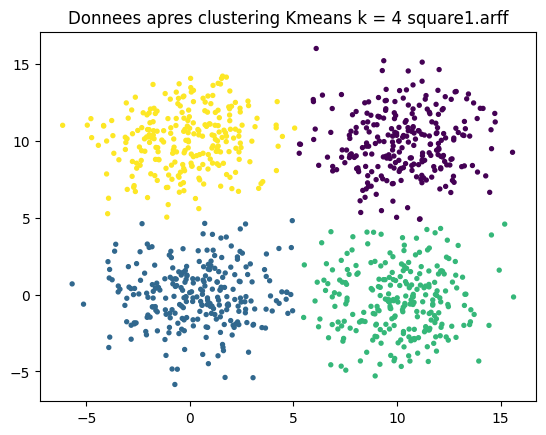

In [ ]:
print("Appel KMeans pour plusieurs valeurs de k, sans soucis")

names = ["twodiamonds.arff", "DS-577.arff", "square1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        score = silhouette_score(datanp, model.fit_predict(datanp))

        if score > best_score:
            best_score = score
            best_k = k
        print ("nb clusters = " , k , ", score = ", score, " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    plt.scatter ( f0 , f1 , c=labels , s = 8 )
    plt.title ( "Donnees apres clustering Kmeans k = " + str(best_k) + " " + name)
    plt.show ()

Appel KMeans pour plusieurs valeurs de k, avec soucis
nb clusters =  2 , score =  0.31797277429595844  , nb iter =  8  ,runtime =  7.41  ms 
nb clusters =  3 , score =  0.34278063679773085  , nb iter =  7  ,runtime =  7.01  ms 
nb clusters =  4 , score =  0.32403440894837493  , nb iter =  10  ,runtime =  0.0  ms 
nb clusters =  5 , score =  0.3198864311661156  , nb iter =  10  ,runtime =  0.0  ms 
nb clusters =  6 , score =  0.3651702957960267  , nb iter =  18  ,runtime =  4.56  ms 
nb clusters =  7 , score =  0.33673627547760476  , nb iter =  11  ,runtime =  0.0  ms 
nb clusters =  8 , score =  0.34580180872457933  , nb iter =  19  ,runtime =  6.74  ms 


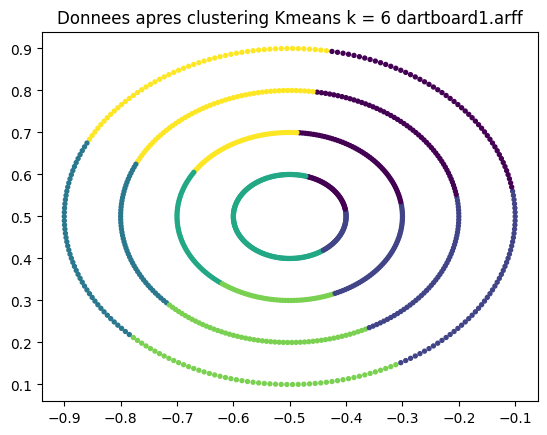

nb clusters =  2 , score =  0.42924847438928077  , nb iter =  3  ,runtime =  0.0  ms 
nb clusters =  3 , score =  0.37629432043385747  , nb iter =  20  ,runtime =  12.32  ms 
nb clusters =  4 , score =  0.4185055897024149  , nb iter =  21  ,runtime =  12.02  ms 
nb clusters =  5 , score =  0.44391352531700967  , nb iter =  13  ,runtime =  2.54  ms 
nb clusters =  6 , score =  0.4688097191945204  , nb iter =  7  ,runtime =  4.55  ms 
nb clusters =  7 , score =  0.48547712661015735  , nb iter =  29  ,runtime =  5.36  ms 
nb clusters =  8 , score =  0.47364251374190586  , nb iter =  12  ,runtime =  9.01  ms 


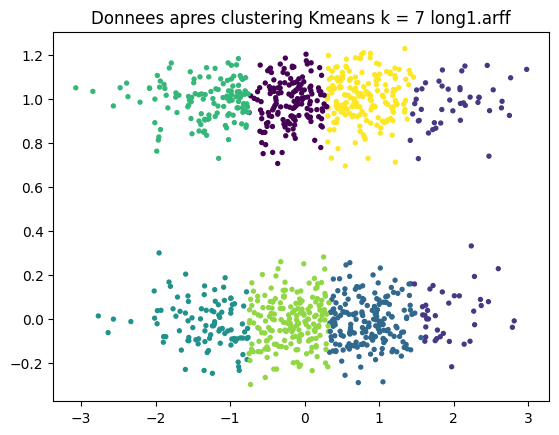

In [29]:
print("Appel KMeans pour plusieurs valeurs de k, avec soucis")

names = ["dartboard1.arff", "long1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        score = silhouette_score(datanp, model.fit_predict(datanp))

        if score > best_score:
            best_score = score
            best_k = k
        print ("nb clusters = " , k , ", score = ", score, " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    plt.scatter ( f0 , f1 , c=labels , s = 8 )
    plt.title ( "Donnees apres clustering Kmeans k = " + str(best_k) + " " + name)
    plt.show ()




